In [ ]:
'''Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
Answer:Anomaly Detection is the process of identifying data points, patterns, or events that deviate significantly from the expected
behavior in a dataset. These unusual observations are called anomalies or outliers. Detecting anomalies is crucial in domains like fraud
detection, network security, medical diagnosis, and industrial monitoring.

Types of Anomalies
1. Point Anomalies
- Meaning: A single data point is anomalous compared to the rest of the dataset.
- Example:
- In a credit card transaction dataset, if most transactions are below ₹10,000 but one transaction is ₹5,00,000, that transaction is a point anomaly.
- In temperature readings, if the average is around 25°C but one reading shows 70°C, it’s a point anomaly.
2. Contextual Anomalies
- Meaning: A data point is anomalous in a specific context, but may be normal in another. Context is defined by attributes like time, location, or surrounding conditions.
- Example:
- A temperature of 30°C is normal in summer but anomalous in winter.
- A sudden spike in website traffic at 3 AM could be a contextual anomaly, since high traffic is expected during the day but unusual at night.

3. Collective Anomalies
- Meaning: A group of related data points together form an anomaly, even if individual points look normal.
- Example:
- In network security, a series of login attempts from different IP addresses within a short time may indicate a DDoS attack (collective anomaly).
- In stock market data, a sequence of small but consistent price drops may signal insider trading, even though each drop individually looks normal.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.
Answer:Isolation Forest
- Approach:
- Based on the idea that anomalies are easier to isolate than normal points.
- Builds random decision trees; anomalies tend to have shorter paths in the tree.
- Works well in high-dimensional datasets.
- Suitable Use Cases:
- Fraud detection in financial transactions.
- Detecting anomalies in large-scale system logs.
- Works best when anomalies are few and distinctly different from normal data.

2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Approach:
- A clustering algorithm that groups points into dense clusters.
- Points in low-density regions are considered anomalies (noise).
- Does not require specifying the number of clusters in advance.
- Suitable Use Cases:
- Spatial data analysis (e.g., detecting unusual geographic events).
- Identifying noise/outliers in customer segmentation.
- Works well for datasets with clusters of varying shapes and sizes.

3. Local Outlier Factor (LOF)
- Approach:
- Measures the local density deviation of a data point compared to its neighbors.
- A point is considered anomalous if its density is significantly lower than that of its neighbors.
- Focuses on local context rather than global distribution.
- Suitable Use Cases:
- Detecting anomalies in sensor networks (where local variations matter).
- Fraud detection in cases where anomalies are subtle and context-dependent.
- Works well when data has varying density regions.

Question 3: What are the key components of a Time Series? Explain each with one example.
Answer:A time series is a sequence of data points collected or recorded at specific time intervals. To analyze
      and forecast time series data, we break it down into its key components:
1. Trend
- Definition: The long-term movement or direction in the data over time (upward, downward, or stable).
- Example:
- The steady increase in global average temperatures over decades indicates a positive trend.

2.. Seasonality
- Definition: Regular, repeating patterns in data that occur at fixed intervals (daily, monthly, yearly).
- Example:
- Ice cream sales peak every summer and drop in winter.
3. Cyclic Component
- Definition: Long-term oscillations in data that are not of fixed length but occur due to economic, social, or business cycles.
- Example:
- Stock market fluctuations due to boom and recession cycles.
- Real estate prices rising and falling with economic conditions.

4. Irregular/Random Component
- Definition: Unpredictable variations caused by unexpected events, noise, or shocks.
- Example:
- Sudden drop in airline travel due to a pandemic.

Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
Answer: A time series is said to be stationary if its statistical properties such as mean, variance, and autocorrelation remain constant over time.
In other words, the series does not depend on the time at which it is observed.
Stationarity is crucial because many forecasting models (like ARIMA) assume the input series is stationary.
How to Test for Stationarity
1. Visual Inspection
- Plot the time series and check if mean/variance change over time.
- Example: A steadily increasing sales chart suggests non-stationarity due to trend.
2. Summary Statistics
- Divide the series into segments and compare mean/variance across segments.
- If they differ significantly, the series is non-stationary.
3. Statistical Tests
- Augmented Dickey-Fuller (ADF) Test:
Null hypothesis = series is non-stationary.
If p-value < 0.05 → reject null → series is stationary.
- KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin):
Null hypothesis = series is stationary.
If p-value < 0.05 → reject null → series is non-stationary.

How to Transform a Non-Stationary Series into Stationary
1. Differencing
- Subtract current value from previous value to remove trend.
- Example: If sales increase steadily, first-order differencing (Yt – Yt-1) can stabilize mean.
2. Detrending
- Remove the trend component explicitly (e.g., regression or moving average).
- Example: Fit a linear trend line and subtract it from the series.
3. Seasonal Adjustment
- Remove seasonal effects using decomposition or differencing at seasonal lag.
- Example: Subtract average monthly effect from monthly sales data.
4. Transformation
- Apply mathematical transformations to stabilize variance.
- Example: Log, square root, or Box-Cox transformation for series with exponential growth.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
Answer:AR Model
AR models use past values of the series itself to predict future values, defined by order
They suit stationary data with autocorrelation but no trends. Common applications include modeling stock returns or economic
indicators without differencing needs.
MA Model
MA models incorporate past forecast errors, with order They capture short-term dependencies in residuals for stationary series.
used for noise-heavy data like certain financial residuals.
ARIMA Model
ARIMA combines AR, I (differencing for stationarity), and MA, denoted ARIMA(p,d,q). The "I" applies
d differences to remove trends becomes stationary. Ideal for non-seasonal univariate forecasting, like sales or GDP, after ACF/PACF analysis for parameters.
SARIMAX Model
SARIMAX adds exogenous variables to SARIMA, as SARIMAX(p,d,q)(P,D,Q)s with external regressors (e.g., holidays, promotions). Structure mirrors SARIMA '''

/tmp/ipython-input-3728630844.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["time"] = pd.date_range(start="1949-01", periods=len(df), freq="M")


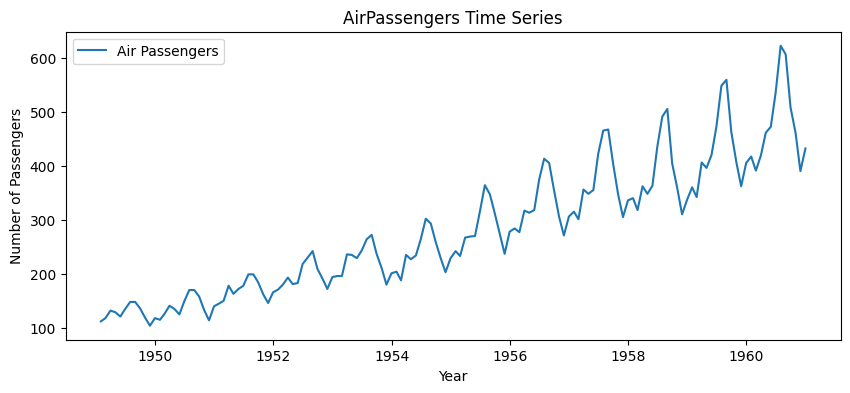

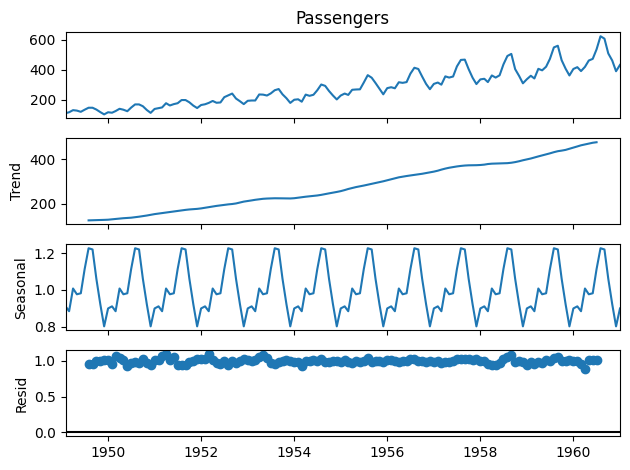

In [1]:
'''Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components'''
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset
# Load dataset from R datasets
data = get_rdataset("AirPassengers")
df = data.data

# Convert to datetime index
df["time"] = pd.date_range(start="1949-01", periods=len(df), freq="M")
df.set_index("time", inplace=True)

# Rename column
df.columns = ["Passengers"]

plt.figure(figsize=(10, 4))
plt.plot(df["Passengers"], label="Air Passengers")
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()
decomposition = seasonal_decompose(df["Passengers"], model="multiplicative")
decomposition.plot()
plt.show()



/tmp/ipython-input-4211722332.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["anomaly"] = iso_forest.fit_predict(scaled_data)


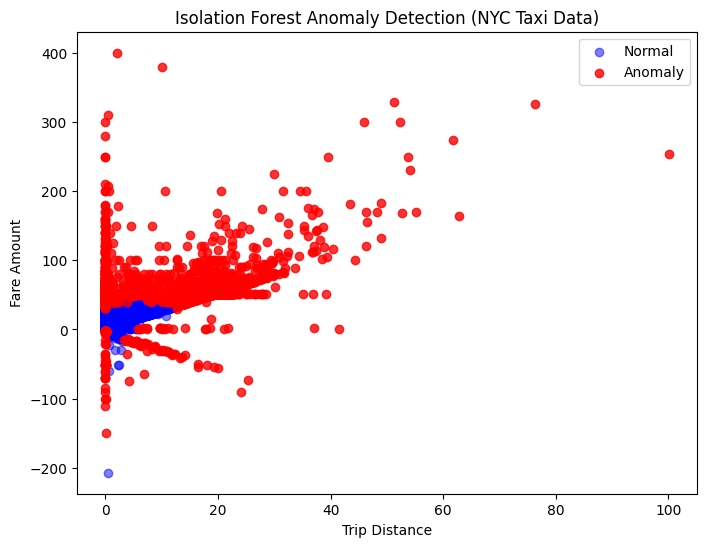

In [3]:
'''Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("NYC_taxi_fare_data.csv")

# Select numerical features
data = df[["fare_amount", "trip_distance"]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

data["anomaly"] = iso_forest.fit_predict(scaled_data)
normal = data[data["anomaly"] == 1]
anomalies = data[data["anomaly"] == -1]
plt.figure(figsize=(8, 6))

plt.scatter(normal["trip_distance"], normal["fare_amount"],
            c="blue", label="Normal", alpha=0.5)

plt.scatter(anomalies["trip_distance"], anomalies["fare_amount"],
            c="red", label="Anomaly", alpha=0.8)

plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest Anomaly Detection (NYC Taxi Data)")
plt.legend()
plt.show()


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Tue, 10 Feb 2026   AIC                           1022.299
Time:                                    16:54:40   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

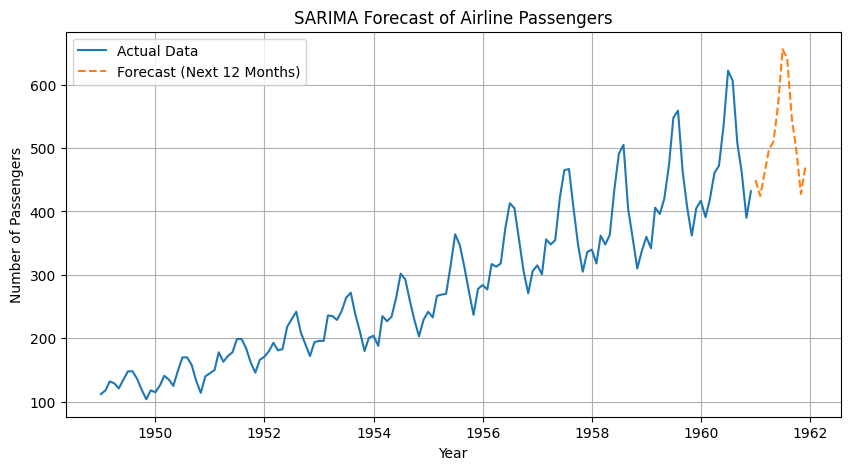

In [4]:
'''Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Load dataset
data = pd.read_csv("AirPassengers.csv")

# Convert Month column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Set Month as index
data.set_index('Month', inplace=True)

# Rename column for convenience
data.columns = ['Passengers']

print(data.head())
model = SARIMAX(
    data['Passengers'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)

model_fit = model.fit(disp=False)
print(model_fit.summary())
# Forecast 12 months ahead
forecast = model_fit.forecast(steps=12)

# Create forecast index
forecast_index = pd.date_range(
    start=data.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq='MS'
)

forecast_series = pd.Series(forecast, index=forecast_index)
print(forecast_series)
plt.figure(figsize=(10, 5))
plt.plot(data['Passengers'], label='Actual Data')
plt.plot(forecast_series, label='Forecast (Next 12 Months)', linestyle='--')
plt.title('SARIMA Forecast of Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


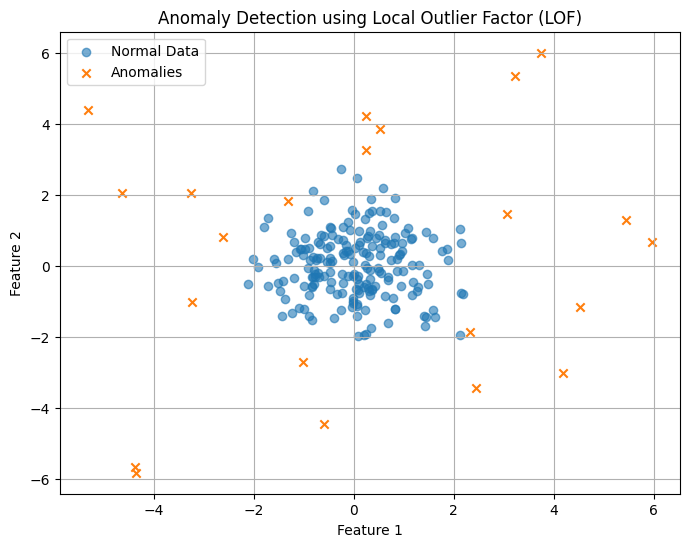

In [5]:
'''Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
# Normal data points
np.random.seed(42)
X_normal = np.random.randn(200, 2)

# Add anomalies
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))

# Combine dataset
X = np.vstack((X_normal, X_outliers))
# Initialize LOF
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.1   # 10% anomalies
)

# Fit and predict
y_pred = lof.fit_predict(X)

# -1 → Outliers, 1 → Normal points
normal_points = X[y_pred == 1]
outliers = X[y_pred == -1]
plt.figure(figsize=(8, 6))
plt.scatter(normal_points[:, 0], normal_points[:, 1],
            label='Normal Data', alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1],
            label='Anomalies', marker='x')

plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


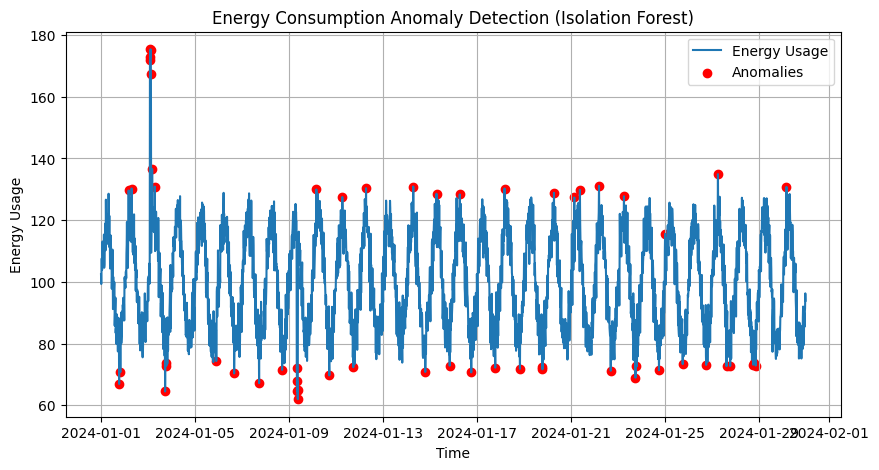

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


In [ ]:
'''Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
# Create datetime index (15-minute intervals)
date_range = pd.date_range(
    start="2024-01-01",
    periods=96 * 30,   # 30 days
    freq="15min"
)

np.random.seed(42)

# Simulated energy usage with daily seasonality
energy_usage = np.array(
    100
    + 20 * np.sin(2 * np.pi * date_range.hour / 24)
    + np.random.normal(0, 5, len(date_range))
)

# Add anomalies (spikes & drops)
energy_usage[200:205] += 60
energy_usage[800:805] -= 50

# Weather feature
temperature = 25 + 5 * np.sin(2 * np.pi * date_range.hour / 24)

df = pd.DataFrame({
    "timestamp": date_range,
    "energy_usage": energy_usage,
    "temperature": temperature
})

df.set_index("timestamp", inplace=True)
# Select features for anomaly detection
X = df[['energy_usage', 'temperature']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42
)

df['anomaly'] = iso_forest.fit_predict(X_scaled)
# -1 = anomaly, 1 = normal
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['energy_usage'], label='Energy Usage')
plt.scatter(
    df[df['anomaly'] == -1].index,
    df[df['anomaly'] == -1]['energy_usage'],
    color='red',
    label='Anomalies'
)
plt.title('Energy Consumption Anomaly Detection (Isolation Forest)')
plt.xlabel('Time')
plt.ylabel('Energy Usage')
plt.legend()
plt.grid(True)
plt.show()
# SARIMAX model with weather as exogenous variable
model = SARIMAX(
    df['energy_usage'],
    exog=df[['temperature']],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 96)  # daily seasonality (96 intervals)
)

model_fit = model.fit(disp=False)
# Future temperature (simulated)
future_temp = df['temperature'][-96:].values.reshape(-1, 1)

forecast = model_fit.forecast(
    steps=96,
    exog=future_temp
)

forecast_index = pd.date_range(
    start=df.index[-1] + pd.Timedelta(minutes=15),
    periods=96,
    freq="15min"
)

forecast_series = pd.Series(forecast, index=forecast_index)
plt.figure(figsize=(10, 5))
plt.plot(df['energy_usage'], label='Historical Data')
plt.plot(forecast_series, label='Forecast (Next 24 Hours)', linestyle='--')
plt.title('Short-Term Energy Demand Forecast (SARIMAX)')
plt.xlabel('Time')
plt.ylabel('Energy Usage')
plt.legend()
plt.grid(True)
plt.show()